# CS4248 Project - Labelled Unreliable News (LUN)

## Load Data

In [1]:
import pandas as pd

full_train_df = pd.read_csv('raw_data/fulltrain.csv', header=None)
full_train_df.columns = ['label', 'text']
print(len(full_train_df))
full_train_df.head()

48854


,label,text
0,1,"A little less than a decade ago, hockey fans w..."
1,1,The writers of the HBO series The Sopranos too...
2,1,Despite claims from the TV news outlet to offe...
3,1,After receiving 'subpar' service and experienc...
4,1,After watching his beloved Seattle Mariners pr...


label
1    0.287530
2    0.142097
3    0.365784
4    0.204589
dtype: float64


<AxesSubplot: >

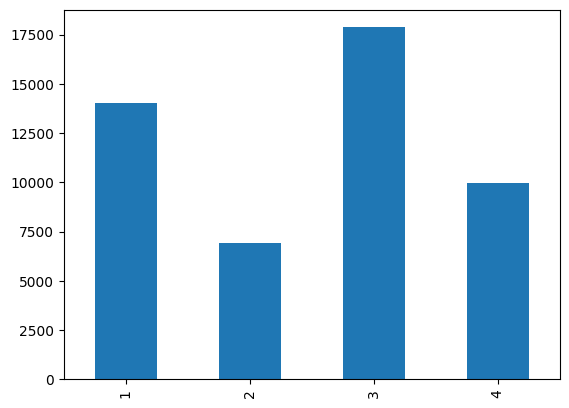

In [2]:
print(full_train_df.value_counts(subset='label', normalize=True).sort_index())


# Add labels to the plot
full_train_df['label'].value_counts().sort_index().plot(kind='bar')


## Duplicates

In [3]:
duplicate_text = full_train_df[full_train_df.duplicated(subset=['text'])]
duplicate_text_and_label = full_train_df[full_train_df.duplicated(subset=['label', 'text'])]
print(f"No. duplicate text and label pairs: {len(duplicate_text_and_label)} ")
print(f"No. duplicate text: {len(duplicate_text)}")
duplicate_text_and_label.head()

No. duplicate text and label pairs: 202 
No. duplicate text: 202


,label,text
260,1,"STRENGTHS: Sees the field almost too well, so ..."
450,1,Italy Fencing Style: Poke-heavy Family History...
642,1,"Brad Swithers, three-time winner of the Molson..."
704,1,A team of British and Egyptian archaeologists ...
1007,1,"Local man Luke Dotson, 34, told reporters this..."


In [4]:
full_train_df[full_train_df.duplicated(subset=['text'], keep=False)]

,label,text
259,1,"STRENGTHS: Sees the field almost too well, so ..."
260,1,"STRENGTHS: Sees the field almost too well, so ..."
449,1,Italy Fencing Style: Poke-heavy Family History...
450,1,Italy Fencing Style: Poke-heavy Family History...
641,1,"Brad Swithers, three-time winner of the Molson..."
...,...,...
48785,4,The Republic of China flag survived an attempt...
48796,4,Taiwan may file a complaint with the World Tra...
48798,4,Taiwan may file a complaint with the World Tra...
48818,4,"Holland's envoy to Taiwan, Menno Goedhart, sai..."


In [5]:
train_df_unique = full_train_df.drop_duplicates(subset=['text'])
len(train_df_unique)

48652

In [6]:
train_df_unique['label'].value_counts().sort_index()

1    13911
2     6939
3    17870
4     9932
Name: label, dtype: int64

## Text Length

,label,text,length
0,1,"A little less than a decade ago, hockey fans w...",873
1,1,The writers of the HBO series The Sopranos too...,715
2,1,Despite claims from the TV news outlet to offe...,4443
3,1,After receiving 'subpar' service and experienc...,3913
4,1,After watching his beloved Seattle Mariners pr...,1058


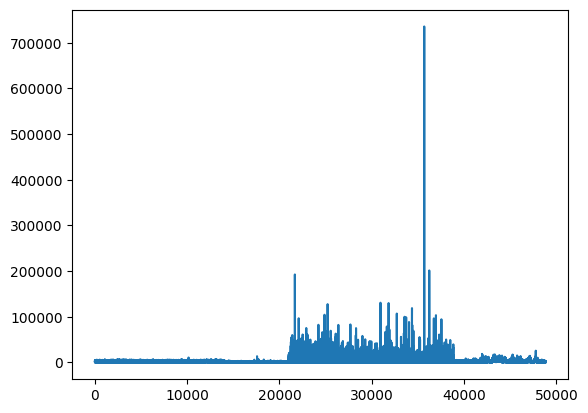

In [7]:
full_train_df['length'] = full_train_df['text'].str.len()
full_train_df['length'].plot(kind='line')
display(full_train_df.head())

In [8]:
long_df = full_train_df[full_train_df['length'] > 26000]
long_df

,label,text,length
21221,3,(1913-2013) One Hundred Years of Darkness Ends...,36450
21239,3,Utility Smart Meter Fires Continue to BurnBy C...,45121
21262,3,5 Triggering Events That Would Place The U.S. ...,31172
21301,3,9 Reasons to Question the Paris Terror Attacks...,55318
21305,3,Attacking Police and Enacting Violence Will Do...,34214
...,...,...,...
38352,3,Russia Calls For Emergency UN Security Council...,30095
38501,3,"Smartworld - Identity EcosystemTsze-lu said, T...",49222
38616,3,Watch This Officer School Another Cop About Ci...,27834
38808,3,Audit Reveals The Pentagon Doesnt Know Where $...,33648


3    1.0
Name: label, dtype: float64


<AxesSubplot: >

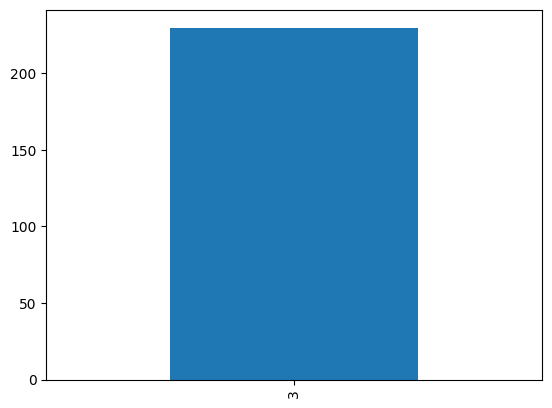

In [9]:
print(long_df['label'].value_counts(normalize=True).sort_index())
long_df['label'].value_counts().sort_index().plot(kind='bar')

In [10]:
short_df = full_train_df[full_train_df['length'] <= 26000]
short_df

,label,text,length
0,1,"A little less than a decade ago, hockey fans w...",873
1,1,The writers of the HBO series The Sopranos too...,715
2,1,Despite claims from the TV news outlet to offe...,4443
3,1,After receiving 'subpar' service and experienc...,3913
4,1,After watching his beloved Seattle Mariners pr...,1058
...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,3492
48850,4,The Taipei city government has encouraged the ...,1700
48851,4,President Ma Ying-jeou said Friday that a park...,2597
48852,4,The families of the four people who were kille...,1392


1    0.288890
2    0.142769
3    0.362784
4    0.205557
Name: label, dtype: float64


<AxesSubplot: >

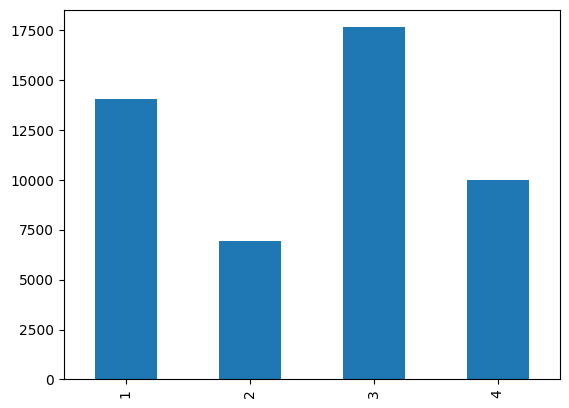

In [11]:
print(short_df['label'].value_counts(normalize=True).sort_index())
short_df['label'].value_counts().sort_index().plot(kind='bar')

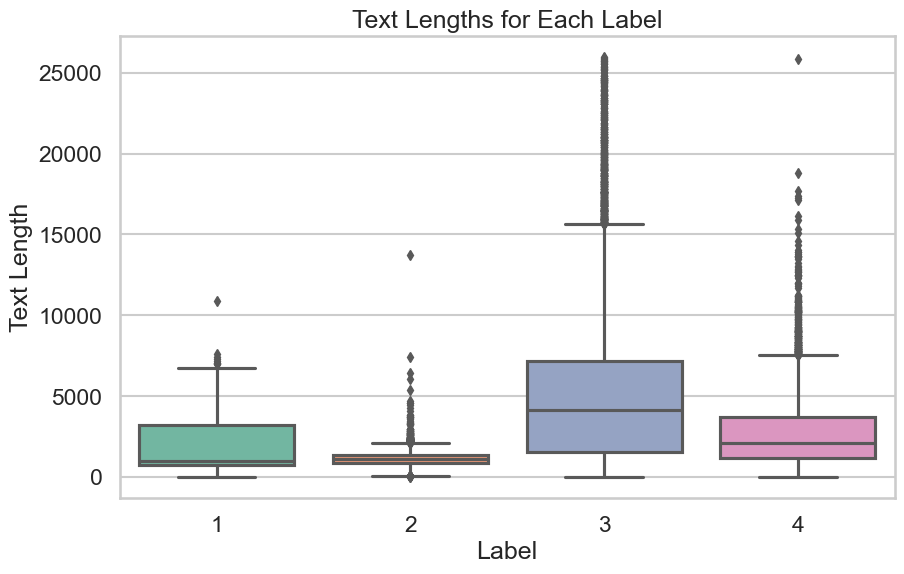

In [12]:
# Plot the text lengths for each label
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='length', data=short_df)
plt.title('Text Lengths for Each Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()